In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('academic_data.csv')

test = pd.read_csv('test.csv')

sample= pd.read_csv('sample_submission.csv')

train.head()

train.drop(columns=['Course'],inplace  =True)

# test.drop(columns=['Course'],inplace = True)

train.isnull().sum()

train.shape

test.shape

test.isnull().sum()

test.head()

test.drop(columns=['id'],inplace = True)

test.shape

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = train.drop(columns=['Target'],axis = 1)

y =train['Target']

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=42)

train.shape

test.shape

train.head()

test.drop(columns=['Course'],inplace = True)



from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(test)


In [2]:
x

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,1,1,126.0,1,1,19,5,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,1,1,125.0,1,19,19,9,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,1,1,137.0,1,3,19,2,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,1,1,131.0,1,19,3,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,1,1,132.0,1,19,37,4,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,1,1,121.0,1,19,1,7,...,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79
76514,1,1,6,1,1,125.0,1,1,38,4,...,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12
76515,5,17,1,1,1,138.0,1,37,37,9,...,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12
76516,1,1,3,1,1,136.0,1,38,37,5,...,0,0,6,0,0,0.000000,0,7.6,2.6,0.32


In [3]:
x.shape

(76518, 35)

In [4]:
x_train.shape

(61214, 35)

In [5]:
y.shape

(76518,)

In [6]:
y

0        1
1        2
2        2
3        3
4        1
        ..
76513    1
76514    1
76515    3
76516    2
76517    1
Name: Target, Length: 76518, dtype: int64

In [7]:
x_train.shape

(61214, 35)

In [8]:
x_val.shape

(15304, 35)

In [9]:
x_test.shape

(51012, 35)

In [10]:
y_val

41775    1
45794    2
46620    3
18945    2
38446    3
        ..
61659    1
9922     2
67011    1
51249    1
25453    1
Name: Target, Length: 15304, dtype: int64

In [11]:
x_train

array([[ 0.        ,  0.71052632,  0.        , ...,  1.54545455,
        -0.47826087, -0.35530086],
       [ 0.        ,  0.        ,  1.        , ...,  1.33333333,
         0.60869565, -1.25501433],
       [ 0.        , -0.42105263,  0.        , ..., -1.06060606,
         0.52173913,  0.        ],
       ...,
       [ 0.        , -0.05263158,  0.        , ...,  0.84848485,
        -0.73913043,  0.13467049],
       [ 0.        ,  0.57894737,  0.        , ...,  1.33333333,
         0.60869565, -1.25501433],
       [ 0.        ,  0.02631579,  0.        , ..., -0.09090909,
         0.        ,  0.40687679]])

## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gar = GradientBoostingClassifier(n_estimators=150,verbose=0,loss='log_loss',learning_rate=0.05,random_state=9,max_depth=5)
gar.fit(x_train,y_train)
gari = gar.predict(x_val)
accuracy_score(y_val,gari)

In [ ]:
a = accuracy_score(y_val,gari)*100

In [12]:
a

83.2919498170413

## lightgbm classifier

In [13]:
from lightgbm import LGBMClassifier
lll =LGBMClassifier(n_estimators=350, random_state=35,n_jobs=-1,learning_rate=0.06)
lll.fit(x_train,y_train)
outputlll = lll.predict(x_val)
accuracy_score(y_val,outputlll)*100

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 35
[LightGBM] [Info] Start training from score -0.746287
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907


83.31155253528489

## catboost

In [14]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(n_estimators=1700,learning_rate=0.05)
cat.fit(x_train,y_train)
cat_acc= cat.predict(x_val)
accuracy_score(y_val,cat_acc)*100

0:	learn: 1.0445425	total: 192ms	remaining: 5m 26s
1:	learn: 0.9971504	total: 227ms	remaining: 3m 12s
2:	learn: 0.9555202	total: 260ms	remaining: 2m 27s
3:	learn: 0.9177363	total: 293ms	remaining: 2m 4s
4:	learn: 0.8844710	total: 329ms	remaining: 1m 51s
5:	learn: 0.8546592	total: 363ms	remaining: 1m 42s
6:	learn: 0.8277325	total: 398ms	remaining: 1m 36s
7:	learn: 0.8029863	total: 438ms	remaining: 1m 32s
8:	learn: 0.7796664	total: 471ms	remaining: 1m 28s
9:	learn: 0.7589519	total: 502ms	remaining: 1m 24s
10:	learn: 0.7399822	total: 535ms	remaining: 1m 22s
11:	learn: 0.7222078	total: 567ms	remaining: 1m 19s
12:	learn: 0.7059312	total: 601ms	remaining: 1m 17s
13:	learn: 0.6913024	total: 638ms	remaining: 1m 16s
14:	learn: 0.6776923	total: 679ms	remaining: 1m 16s
15:	learn: 0.6654464	total: 717ms	remaining: 1m 15s
16:	learn: 0.6537285	total: 754ms	remaining: 1m 14s
17:	learn: 0.6428541	total: 790ms	remaining: 1m 13s
18:	learn: 0.6330971	total: 828ms	remaining: 1m 13s
19:	learn: 0.6236243	to

161:	learn: 0.4509436	total: 5.01s	remaining: 47.5s
162:	learn: 0.4507717	total: 5.03s	remaining: 47.5s
163:	learn: 0.4506283	total: 5.06s	remaining: 47.4s
164:	learn: 0.4505189	total: 5.08s	remaining: 47.3s
165:	learn: 0.4504312	total: 5.11s	remaining: 47.2s
166:	learn: 0.4503242	total: 5.14s	remaining: 47.2s
167:	learn: 0.4501878	total: 5.17s	remaining: 47.1s
168:	learn: 0.4500979	total: 5.19s	remaining: 47s
169:	learn: 0.4499890	total: 5.22s	remaining: 47s
170:	learn: 0.4498347	total: 5.25s	remaining: 46.9s
171:	learn: 0.4496193	total: 5.27s	remaining: 46.8s
172:	learn: 0.4494479	total: 5.29s	remaining: 46.7s
173:	learn: 0.4493580	total: 5.32s	remaining: 46.6s
174:	learn: 0.4492720	total: 5.34s	remaining: 46.5s
175:	learn: 0.4491283	total: 5.36s	remaining: 46.5s
176:	learn: 0.4490496	total: 5.39s	remaining: 46.3s
177:	learn: 0.4489449	total: 5.41s	remaining: 46.3s
178:	learn: 0.4488020	total: 5.44s	remaining: 46.2s
179:	learn: 0.4487331	total: 5.46s	remaining: 46.1s
180:	learn: 0.44

327:	learn: 0.4348657	total: 9.17s	remaining: 38.4s
328:	learn: 0.4347895	total: 9.2s	remaining: 38.3s
329:	learn: 0.4347158	total: 9.22s	remaining: 38.3s
330:	learn: 0.4346477	total: 9.25s	remaining: 38.2s
331:	learn: 0.4345772	total: 9.27s	remaining: 38.2s
332:	learn: 0.4344604	total: 9.3s	remaining: 38.2s
333:	learn: 0.4344219	total: 9.32s	remaining: 38.1s
334:	learn: 0.4343507	total: 9.35s	remaining: 38.1s
335:	learn: 0.4342892	total: 9.37s	remaining: 38s
336:	learn: 0.4341435	total: 9.4s	remaining: 38s
337:	learn: 0.4340643	total: 9.42s	remaining: 38s
338:	learn: 0.4340028	total: 9.45s	remaining: 37.9s
339:	learn: 0.4339565	total: 9.47s	remaining: 37.9s
340:	learn: 0.4338864	total: 9.49s	remaining: 37.8s
341:	learn: 0.4338415	total: 9.52s	remaining: 37.8s
342:	learn: 0.4337774	total: 9.54s	remaining: 37.7s
343:	learn: 0.4336884	total: 9.56s	remaining: 37.7s
344:	learn: 0.4335993	total: 9.59s	remaining: 37.7s
345:	learn: 0.4335481	total: 9.61s	remaining: 37.6s
346:	learn: 0.4334851

490:	learn: 0.4243934	total: 13.3s	remaining: 32.8s
491:	learn: 0.4243143	total: 13.3s	remaining: 32.8s
492:	learn: 0.4242307	total: 13.4s	remaining: 32.7s
493:	learn: 0.4241513	total: 13.4s	remaining: 32.7s
494:	learn: 0.4240704	total: 13.4s	remaining: 32.7s
495:	learn: 0.4239961	total: 13.5s	remaining: 32.7s
496:	learn: 0.4239702	total: 13.5s	remaining: 32.6s
497:	learn: 0.4239219	total: 13.5s	remaining: 32.6s
498:	learn: 0.4238700	total: 13.5s	remaining: 32.6s
499:	learn: 0.4238346	total: 13.6s	remaining: 32.5s
500:	learn: 0.4237873	total: 13.6s	remaining: 32.5s
501:	learn: 0.4237579	total: 13.6s	remaining: 32.5s
502:	learn: 0.4236995	total: 13.6s	remaining: 32.5s
503:	learn: 0.4236676	total: 13.7s	remaining: 32.4s
504:	learn: 0.4235874	total: 13.7s	remaining: 32.4s
505:	learn: 0.4235424	total: 13.7s	remaining: 32.4s
506:	learn: 0.4235008	total: 13.7s	remaining: 32.4s
507:	learn: 0.4234575	total: 13.8s	remaining: 32.3s
508:	learn: 0.4234159	total: 13.8s	remaining: 32.3s
509:	learn: 

655:	learn: 0.4163205	total: 17.6s	remaining: 28.1s
656:	learn: 0.4162760	total: 17.7s	remaining: 28.1s
657:	learn: 0.4162185	total: 17.7s	remaining: 28s
658:	learn: 0.4161712	total: 17.7s	remaining: 28s
659:	learn: 0.4161091	total: 17.7s	remaining: 28s
660:	learn: 0.4160638	total: 17.8s	remaining: 27.9s
661:	learn: 0.4159844	total: 17.8s	remaining: 27.9s
662:	learn: 0.4159302	total: 17.8s	remaining: 27.9s
663:	learn: 0.4158982	total: 17.8s	remaining: 27.8s
664:	learn: 0.4158556	total: 17.9s	remaining: 27.8s
665:	learn: 0.4158177	total: 17.9s	remaining: 27.8s
666:	learn: 0.4157851	total: 17.9s	remaining: 27.8s
667:	learn: 0.4157610	total: 17.9s	remaining: 27.7s
668:	learn: 0.4157288	total: 18s	remaining: 27.7s
669:	learn: 0.4157024	total: 18s	remaining: 27.7s
670:	learn: 0.4156537	total: 18s	remaining: 27.6s
671:	learn: 0.4156153	total: 18s	remaining: 27.6s
672:	learn: 0.4155612	total: 18.1s	remaining: 27.6s
673:	learn: 0.4155131	total: 18.1s	remaining: 27.5s
674:	learn: 0.4154661	tota

815:	learn: 0.4097354	total: 21.7s	remaining: 23.5s
816:	learn: 0.4097201	total: 21.7s	remaining: 23.4s
817:	learn: 0.4096986	total: 21.7s	remaining: 23.4s
818:	learn: 0.4096485	total: 21.7s	remaining: 23.4s
819:	learn: 0.4096201	total: 21.8s	remaining: 23.4s
820:	learn: 0.4095786	total: 21.8s	remaining: 23.3s
821:	learn: 0.4094998	total: 21.8s	remaining: 23.3s
822:	learn: 0.4094573	total: 21.9s	remaining: 23.3s
823:	learn: 0.4093884	total: 21.9s	remaining: 23.3s
824:	learn: 0.4093269	total: 21.9s	remaining: 23.2s
825:	learn: 0.4092908	total: 21.9s	remaining: 23.2s
826:	learn: 0.4092419	total: 22s	remaining: 23.2s
827:	learn: 0.4092019	total: 22s	remaining: 23.2s
828:	learn: 0.4091726	total: 22s	remaining: 23.1s
829:	learn: 0.4091190	total: 22s	remaining: 23.1s
830:	learn: 0.4090731	total: 22.1s	remaining: 23.1s
831:	learn: 0.4090367	total: 22.1s	remaining: 23.1s
832:	learn: 0.4089925	total: 22.1s	remaining: 23s
833:	learn: 0.4089281	total: 22.1s	remaining: 23s
834:	learn: 0.4089026	to

976:	learn: 0.4031631	total: 26s	remaining: 19.2s
977:	learn: 0.4031425	total: 26s	remaining: 19.2s
978:	learn: 0.4031082	total: 26s	remaining: 19.2s
979:	learn: 0.4030364	total: 26.1s	remaining: 19.1s
980:	learn: 0.4029727	total: 26.1s	remaining: 19.1s
981:	learn: 0.4029296	total: 26.1s	remaining: 19.1s
982:	learn: 0.4029049	total: 26.1s	remaining: 19.1s
983:	learn: 0.4028866	total: 26.2s	remaining: 19s
984:	learn: 0.4028512	total: 26.2s	remaining: 19s
985:	learn: 0.4028159	total: 26.2s	remaining: 19s
986:	learn: 0.4027966	total: 26.2s	remaining: 19s
987:	learn: 0.4027446	total: 26.3s	remaining: 18.9s
988:	learn: 0.4027052	total: 26.3s	remaining: 18.9s
989:	learn: 0.4026566	total: 26.3s	remaining: 18.9s
990:	learn: 0.4025979	total: 26.3s	remaining: 18.8s
991:	learn: 0.4025756	total: 26.4s	remaining: 18.8s
992:	learn: 0.4025365	total: 26.4s	remaining: 18.8s
993:	learn: 0.4025181	total: 26.4s	remaining: 18.8s
994:	learn: 0.4024735	total: 26.4s	remaining: 18.7s
995:	learn: 0.4024307	tota

1139:	learn: 0.3969604	total: 30.3s	remaining: 14.9s
1140:	learn: 0.3969495	total: 30.4s	remaining: 14.9s
1141:	learn: 0.3969252	total: 30.4s	remaining: 14.9s
1142:	learn: 0.3968862	total: 30.4s	remaining: 14.8s
1143:	learn: 0.3968484	total: 30.5s	remaining: 14.8s
1144:	learn: 0.3968291	total: 30.5s	remaining: 14.8s
1145:	learn: 0.3968099	total: 30.5s	remaining: 14.7s
1146:	learn: 0.3967900	total: 30.5s	remaining: 14.7s
1147:	learn: 0.3967529	total: 30.6s	remaining: 14.7s
1148:	learn: 0.3967190	total: 30.6s	remaining: 14.7s
1149:	learn: 0.3966890	total: 30.6s	remaining: 14.6s
1150:	learn: 0.3966394	total: 30.6s	remaining: 14.6s
1151:	learn: 0.3966115	total: 30.7s	remaining: 14.6s
1152:	learn: 0.3965787	total: 30.7s	remaining: 14.6s
1153:	learn: 0.3965374	total: 30.7s	remaining: 14.5s
1154:	learn: 0.3965011	total: 30.7s	remaining: 14.5s
1155:	learn: 0.3964642	total: 30.8s	remaining: 14.5s
1156:	learn: 0.3964185	total: 30.8s	remaining: 14.5s
1157:	learn: 0.3963986	total: 30.8s	remaining:

1298:	learn: 0.3915213	total: 34.4s	remaining: 10.6s
1299:	learn: 0.3914961	total: 34.5s	remaining: 10.6s
1300:	learn: 0.3914503	total: 34.5s	remaining: 10.6s
1301:	learn: 0.3913955	total: 34.5s	remaining: 10.6s
1302:	learn: 0.3913632	total: 34.6s	remaining: 10.5s
1303:	learn: 0.3913365	total: 34.6s	remaining: 10.5s
1304:	learn: 0.3913128	total: 34.6s	remaining: 10.5s
1305:	learn: 0.3912571	total: 34.6s	remaining: 10.4s
1306:	learn: 0.3912113	total: 34.7s	remaining: 10.4s
1307:	learn: 0.3911805	total: 34.7s	remaining: 10.4s
1308:	learn: 0.3911693	total: 34.7s	remaining: 10.4s
1309:	learn: 0.3911463	total: 34.7s	remaining: 10.3s
1310:	learn: 0.3911036	total: 34.8s	remaining: 10.3s
1311:	learn: 0.3910769	total: 34.8s	remaining: 10.3s
1312:	learn: 0.3910354	total: 34.8s	remaining: 10.3s
1313:	learn: 0.3909810	total: 34.8s	remaining: 10.2s
1314:	learn: 0.3909222	total: 34.9s	remaining: 10.2s
1315:	learn: 0.3908443	total: 34.9s	remaining: 10.2s
1316:	learn: 0.3908179	total: 34.9s	remaining:

1458:	learn: 0.3856823	total: 38.6s	remaining: 6.37s
1459:	learn: 0.3856378	total: 38.6s	remaining: 6.34s
1460:	learn: 0.3855915	total: 38.6s	remaining: 6.32s
1461:	learn: 0.3855325	total: 38.6s	remaining: 6.29s
1462:	learn: 0.3854841	total: 38.7s	remaining: 6.26s
1463:	learn: 0.3854539	total: 38.7s	remaining: 6.24s
1464:	learn: 0.3854165	total: 38.7s	remaining: 6.21s
1465:	learn: 0.3853547	total: 38.7s	remaining: 6.18s
1466:	learn: 0.3853057	total: 38.8s	remaining: 6.16s
1467:	learn: 0.3852736	total: 38.8s	remaining: 6.13s
1468:	learn: 0.3852008	total: 38.8s	remaining: 6.11s
1469:	learn: 0.3851822	total: 38.9s	remaining: 6.08s
1470:	learn: 0.3851400	total: 38.9s	remaining: 6.05s
1471:	learn: 0.3850948	total: 38.9s	remaining: 6.03s
1472:	learn: 0.3850445	total: 38.9s	remaining: 6s
1473:	learn: 0.3850336	total: 39s	remaining: 5.97s
1474:	learn: 0.3849855	total: 39s	remaining: 5.95s
1475:	learn: 0.3849497	total: 39s	remaining: 5.92s
1476:	learn: 0.3849147	total: 39s	remaining: 5.89s
1477

1616:	learn: 0.3805537	total: 42.6s	remaining: 2.18s
1617:	learn: 0.3805018	total: 42.6s	remaining: 2.16s
1618:	learn: 0.3804580	total: 42.6s	remaining: 2.13s
1619:	learn: 0.3804223	total: 42.6s	remaining: 2.1s
1620:	learn: 0.3803607	total: 42.7s	remaining: 2.08s
1621:	learn: 0.3803401	total: 42.7s	remaining: 2.05s
1622:	learn: 0.3803061	total: 42.7s	remaining: 2.03s
1623:	learn: 0.3802731	total: 42.7s	remaining: 2s
1624:	learn: 0.3802347	total: 42.8s	remaining: 1.97s
1625:	learn: 0.3801996	total: 42.8s	remaining: 1.95s
1626:	learn: 0.3801595	total: 42.8s	remaining: 1.92s
1627:	learn: 0.3801056	total: 42.9s	remaining: 1.9s
1628:	learn: 0.3800666	total: 42.9s	remaining: 1.87s
1629:	learn: 0.3800481	total: 42.9s	remaining: 1.84s
1630:	learn: 0.3800242	total: 42.9s	remaining: 1.82s
1631:	learn: 0.3800095	total: 43s	remaining: 1.79s
1632:	learn: 0.3799880	total: 43s	remaining: 1.76s
1633:	learn: 0.3799262	total: 43s	remaining: 1.74s
1634:	learn: 0.3798936	total: 43.1s	remaining: 1.71s
1635

83.44223732357554

In [15]:
c = accuracy_score(y_val,cat_acc)*100

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid_catboost = {
#     'iterations': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'bagging_temperature': [0, 0.5, 1],
    'random_strength': [1, 2, 5, 10]
}
Grid = GridSearchCV(estimator=cat,param_grid=param_grid_catboost,cv=5,n_jobs=-1,scoring='accuracy')

In [ ]:
Grid.fit(x_train,y_train)

In [ ]:
best_params = Grid.best_params_
best_estimator = Grid.best_estimator_

In [ ]:
cat_best_pred = best_estimator.predict(x_val)

In [ ]:
accuracy_score(y_val,cat_best_pred)

### all the multi models

In [30]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,StackingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [60]:
from sklearn.ensemble import StackingClassifier
base_models = []

base_models.append(('a', HistGradientBoostingClassifier(loss='log_loss',max_iter=250,learning_rate=0.1,max_depth=7)))
base_models.append(('b', HistGradientBoostingClassifier(loss='log_loss',max_iter=250,learning_rate=0.1,max_depth=7)))
base_models.append(('c', HistGradientBoostingClassifier(loss='log_loss',max_iter=250,learning_rate=0.1,max_depth=7)))
base_models.append(('d', HistGradientBoostingClassifier(loss='log_loss',max_iter=250,learning_rate=0.1,max_depth=7)))
base_models.append(('e', HistGradientBoostingClassifier(loss='log_loss',max_iter=250,learning_rate=0.1,max_depth=7)))


meta_model =LogisticRegression(multi_class='ovr',max_iter=10000,n_jobs=-1)
clfstck = StackingClassifier(estimators=base_models, final_estimator=meta_model)

clfstck.fit(x_train, y_train)
clf_y_pred = clfstck.predict(x_val)
clf_score = accuracy_score(y_val,clf_y_pred)
clf_score

0.8337689492943021

In [61]:
clf_score*100

83.37689492943021

In [43]:
hist = HistGradientBoostingClassifier(loss='log_loss',learning_rate=0.1,max_iter=250,max_depth=7,max_bins=234,min_samples_leaf=17)
hist.fit(x_train,y_train)
hist.predict(x_val)
accuracy_score(y_val,hist.predict(x_val))*100

83.40303188708835

In [44]:
hist.get_params()

{'categorical_features': None,
 'class_weight': None,
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_bins': 234,
 'max_depth': 7,
 'max_iter': 250,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 17,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## using ensemble

In [17]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,StackingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
clf1 = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42
)
clf2 = AdaBoostClassifier(
    n_estimators=200, learning_rate=0.1, random_state=42
)
clf3 = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42
)
clf4 = HistGradientBoostingClassifier(
    learning_rate=0.1, max_iter=200, max_leaf_nodes=31, min_samples_leaf=20, random_state=42
)
clf5 = ExtraTreesClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42
)
clf6 = BaggingClassifier(
    n_estimators=200, max_samples=0.8, max_features=0.8, random_state=42
)
model = Sequential()
model.add(Dense(220, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(75, activation ='relu'))
model.add(Dense(3,activation = 'softmax'))

In [35]:
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', clf1), ('ada', clf2), ('gb', clf3), ('hgb', clf4),
        ('et', clf5), ('bag', clf6),('mod', model)],
    final_estimator=LogisticRegression(max_iter=1000,multi_class='ovr'),  
    cv=2
)
stacking_clf.fit(x_train,y_train)

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x000002638332C790>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [25]:
stacking_clf.predict(x_val)

array([1, 2, 3, ..., 1, 1, 1], dtype=int64)

In [26]:
predicationvoting= stacking_clf.predict(x_test)
predicationvoting

array([2, 1, 1, ..., 2, 2, 2], dtype=int64)

In [27]:
sample['Target'] = predicationvoting
catmap = {1:'Graduate',2:'Dropout',3:'Enrolled'}
sample['Target'] = sample['Target'].map(catmap)
sample.to_csv('submission.csv',index = None)
sample

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [28]:
sample['Target'].value_counts()

Graduate    26517
Dropout     15472
Enrolled     9023
Name: Target, dtype: int64

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [102]:
model = Sequential()
model.add(Dense(105,activation='relu',input_dim = x_train.shape[1]))
# model.add(Dense(105,activation='relu'))

model.add(Dense(4,activation='softmax'))

In [103]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 105)               3780      
                                                                 
 dense_14 (Dense)            (None, 4)                 424       
                                                                 
Total params: 4204 (16.42 KB)
Trainable params: 4204 (16.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
from keras.callbacks import EarlyStopping
callbacks=EarlyStopping(min_delta=0.001,patience=3,mode='auto')

In [105]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5,callbacks=[callbacks])

Epoch 1/5
1913/1913 [==============================] - 5s 2ms/step - loss: 0.5497 - accuracy: 0.7848 - val_loss: 0.4910 - val_accuracy: 0.8115
Epoch 2/5
1913/1913 [==============================] - 4s 2ms/step - loss: 0.4878 - accuracy: 0.8099 - val_loss: 0.4759 - val_accuracy: 0.8145
Epoch 3/5
1913/1913 [==============================] - 4s 2ms/step - loss: 0.4799 - accuracy: 0.8139 - val_loss: 0.4721 - val_accuracy: 0.8169
Epoch 4/5
1913/1913 [==============================] - 4s 2ms/step - loss: 0.4766 - accuracy: 0.8150 - val_loss: 0.4750 - val_accuracy: 0.8146
Epoch 5/5
1913/1913 [==============================] - 4s 2ms/step - loss: 0.4741 - accuracy: 0.8155 - val_loss: 0.4722 - val_accuracy: 0.8181


In [107]:
import matplotlib.pyplot as plt

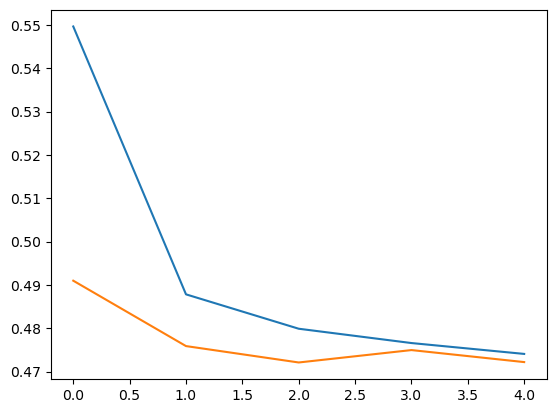

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


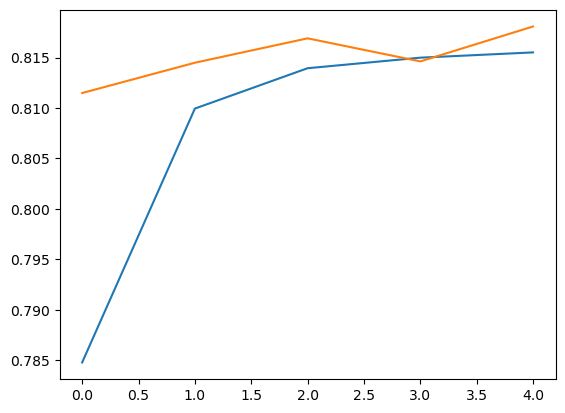

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [110]:
sp = model.predict(x_test)

1595/1595 [==============================] - 3s 2ms/step


In [111]:
sp

array([[5.5795355e-09, 5.9702041e-05, 9.9821579e-01, 1.7245802e-03],
       [1.0240345e-05, 8.8834047e-01, 1.1968949e-02, 9.9680319e-02],
       [5.2010423e-06, 5.5828565e-01, 5.7933167e-02, 3.8377601e-01],
       ...,
       [3.1638569e-06, 2.9607723e-03, 9.7773212e-01, 1.9303937e-02],
       [5.4661859e-07, 8.9549059e-03, 9.0798879e-01, 8.3055750e-02],
       [3.5636962e-08, 2.1160305e-03, 9.9072295e-01, 7.1610068e-03]],
      dtype=float32)